*SIO221a Notes - Alford and Gille*

*Reading: Bendat and Piersol 5.2.4

Concepts covered: Variance preserving spectra; Wavenumber spectra; Multidimensional spectra

# Lecture 15

*Recap*

Last time we looked at aliasing; in this lecture we are going to first look at some interpretations of spectra including variance preserving spectra, then extend our spectral techniques to i) spatial records; ii) multidimensional records.


**Variance preserving spectra**

Last time we said, that one of the virtues of the properly normalized
spectrum is that the area under the curve should represent the signal
variance within a specific frequency band:
$$
\text{variance in a band} = \int_{f-\Delta f/2}^{f+\Delta f/2} S(f) \, df
$$
This sounds good as a concept, but in log-log space, it's visually misleading.

Here's an example, using some white noise with a sinusoidal signal:

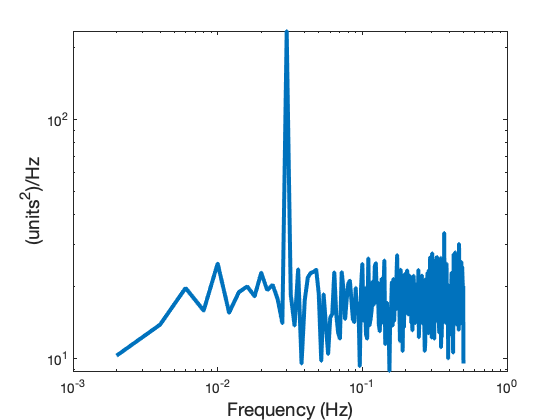

In [26]:
fsig=0.03; %Signal at about 30 seconds 
n2s=3; % noise-to-signal ratio
dt=1; %one second
time=(1:10000)'.*dt;

%Red spectrum
%b=n2s*cumsum(randn(10000,1))+cos(2*pi*fsig*time);

%White spectrum
b=n2s*randn(10000,1)+cos(2*pi*fsig*time);
T=500;
fn=1/2/dt;
f=(0:250)./250.*fn;
bb=reshape(b,500,10000/500);
fbb=fft(detrend(bb));
amp=abs(fbb(1:251,:)).^2 / 500;
sbb=mean(amp,2);
sbb(2:250)=sbb(2:250)*2;

loglog(f,sbb,'LineWidth',3)
xlabel('Frequency (Hz)','FontSize',14)
ylabel('(units^2)/Hz','FontSize',14)


So we might look at the white spectrum away from the sinusoidal peak and say "there's the same energy at all frequencies."  But even though that's true, equal areas of the plot have very different area because of the log scale: e.g. the frequency range 0.02-0.05 has only 1/10 the variance of the frequency range 0.2-0.5. And it's hard to tell how much variance is in the peak versus in the noise.

That might not bother you, but sometimes that
visual representation is helpful.  Consider a spectrum $S_{xx}(f)$ derived from our
Fourier amplitudes $X(f)$.  In log space, the area under our curves is a
pseudo-variance $s_*^2$:
$$
s_{*}^2 = \int_{f-\Delta f/2}^{f+\Delta f/2} \log(S_{xx}(f)) \, df
$$
If we want to plot something that is more directly representative of variance,
we can try this:

$$
s^2 = \int_{f-\Delta f/2}^{f+\Delta f/2} S_{xx}(f) \, df = \int_{f-\Delta f/2}^{f+\Delta f/2}
f S_{xx}(f) d[\log(f)]
$$

This means that instead of plotting log{$S$} vs log($f$), we could plot
$f S_{xx}(f)$ in linear space vs $f$ in log space.  This is especially useful for
features that have strong peaks not exactly at the lowest frequency.

So now we can see that the lower plot shows that there is more variance at higher frequency, and that the high-frequency noise actually has more variance than the signal:

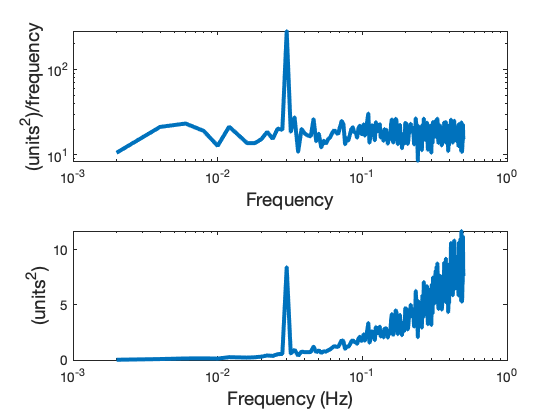

In [21]:
subplot(2,1,1)
loglog(f,sbb,'LineWidth',3)
xlabel('Frequency','FontSize',14)
ylabel('(units^2)/frequency','FontSize',14)

subplot(2,1,2)
semilogx(f,f'.*sbb,'LineWidth',3)
xlabel('Frequency (Hz)','FontSize',14)
ylabel('(units^2)','FontSize',14)

**Wavenumber spectra**

So far we've talked about time series nearly exclusively.  But in oceanography we have plenty of *spatial* records, often profiles of some quantity $x(z)$.  Seems like we should be able to use all of our methods we've developed for time series to understand these spatial data too.

Let's recall the Fourier transform pairs for time series $x(t)$ and their Fourier coefficients $X(f)$ from lecture 7:
$$
X(f) = \int_{-\infty}^{\infty} x(t) e^{-i2\pi f t}\, dt
$$

$$
x(t) = \int_{-\infty}^{\infty} X(f)  e^{i2\pi ft}\, df
$$

And the frequency spectrum:

$$\Phi_x(f) \equiv \lim_{\Delta f \to 0}\frac{\langle X^*(f)X(f)\rangle}{\Delta f}$$


Here, as we've discussed ad nauseam, we use the Fourier transform and the frequency spectrum to describe the relative energy in the time series at each of the frequencies we  can resolve, from the fundamental frequency $f_1\equiv T^{-1}$ to the Nyquist frequency $f_N\equiv\frac{1}{2 \Delta t}$.

We can draw an exact analogy between these concepts in the time domain and apply them to the space domain.  Here, we seek to represent a depth profile of some quantity, $x(z)$, as a superposition of sinusoids or complex exponentials with spatial wavenumbers $m$.  Just as in the time domain, our frequencies $f$ are the inverse of the wave period, here our wavenumbers are the inverse of the vertical wavelength $\lambda$.

$$
X(m) = \int_{-\infty}^{\infty} x(z) e^{-i2\pi mz}\, dz
$$

$$
x(z) = \int_{-\infty}^{\infty} X(m)  e^{i2\pi mz}\, dm
$$

The wavenumber spectrum is then given by:

$$\Phi_x(m) \equiv \lim_{\Delta m \to 0}\frac{\langle X^*(m)X(m)\rangle}{\Delta m}$$

The vertical wavenumber resolution goes from $m_1\equiv L^{-1}$ where $L$ is the overall spatial record length (in meters), and our Nyquist wavenumber is given by $m_N\equiv\frac{1}{2\Delta z}$ where $\Delta z$ is our data spacing (also in meters).  Wavenumbers have units of inverse lengths, so m$^{-1}$ in this case.

And of course, if we had horizontal data, the analogy would be fine too, with our wavenumbers then corresponding to horizontal wavelengths.

Here's an example using a synthesized vertical profile of velocity with some noise.

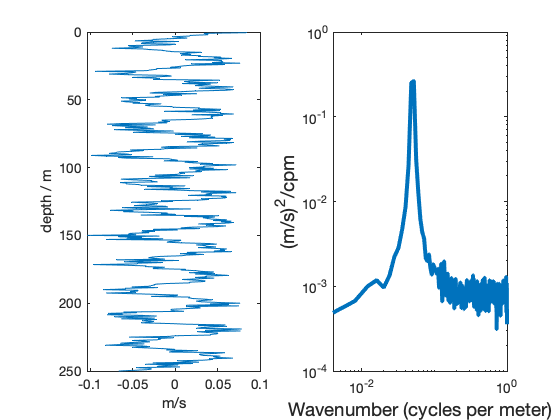

In [84]:
msig=0.05; %Signal at about 20 m vertical wavelength 
noise_rms=0.02; % rms noise
signal = 0.05; %signal amplitude in m/s
dz=1/2; %1/2 m spacing - 5000 m profile
z=(1:10000)'.*dz;

%White spectrum
b=noise_rms*randn(10000,1)+signal.*cos(2*pi*msig*z);

L=250;
mn=1/2/dz; %Nyquist wavenumber
m=(0:250)./250.*mn; %wavenumber vector
bb=reshape(b,500,10000/500);
fbb=fft(detrend(bb));
amp=abs(fbb(1:251,:)).^2 / 500;
sbb=mean(amp,2);
sbb(2:250)=sbb(2:250)*2;

subplot(121)
plot(bb(:,1),z(1:500));
axis ij
xlabel('m/s')
ylabel('depth / m')
subplot(122)
loglog(m,sbb,'LineWidth',3)
xlabel('Wavenumber (cycles per meter)','FontSize',14)
ylabel('(m/s)^2/cpm','FontSize',14)

All properties we learned about the spectrum and Fourier transforms apply here as well.  For example, we can still use Parseval's theorem to compute the variance and verify our normalizations.

Another useful property is that the derivative properties we learned earlier apply here as well.  Specifically, we often care about shear, which is the vertical derivative of velocity.  Since we've already computed the velocity wavenumber spectrum, then the spectrum of its vertical derivative is simply

$$S_{shear}=(2\pi m)^2 S_{vel}.$$


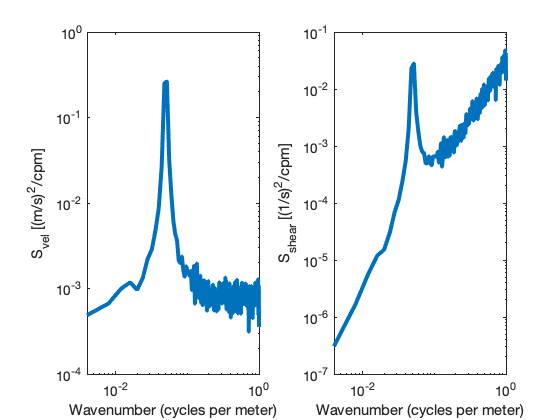

In [85]:
subplot(121)
plot(bb(:,1),z(1:500));
axis ij
xlabel('m/s')
ylabel('depth / m')
subplot(121)
loglog(m,sbb,'LineWidth',3)
xlabel('Wavenumber (cycles per meter)')
ylabel('S_{vel} [(m/s)^2/cpm]')

subplot(122)
loglog(m,sbb.*(2*pi*m.').^2,'LineWidth',3)
xlabel('Wavenumber (cycles per meter)')
ylabel('S_{shear} [(1/s)^2/cpm]')


Let's imagine these data were from a real ADCP with an RMS noise of 0.02 m/s, sampling a hypothetical internal wave of amplitude 0.05 m/s and vertical wavelength 20 m.  We can use the tools from before to estimate the variance in the noise spectrum (the white portion at left).  We can also see how differentiation has made the white noise spectrum *blue* in the shear spectrum.  This example shows why differentiation often makes your data look noiser, and shows why it's hard to study small-scale internal waves!

**Frequency-Wavenumber examples.**

Now, 
we'll consider what happens when we want to consider sinusoidal patterns of
variability in both time and space.  
First consider some example frequency-wavenumber spectra.  What frequencies and wavenumbers are
resolved?  What is plotted?  What is the Nyquist frequency and Nyquist wavenumber?  Is the full
frequency-wavenumber space represented?

As a reminder, frequency represents cycles per unit time, and wavenumber represents 
cycles per unit distance.

We use frequency-wavenumber spectra as a means to track propagating sinusoidal patterns.  If it
has a characteristic wavelength and frequency, we might suppress that variability if we 
didn't think about the full structure of the propagating wave.  Westward propagating Rossby 
waves and eastward propagating Kelvin waves have characteristic frequencies and characteristic
wavenumbers.  

**Basics**

Consider a data set $y(x,t)$ where $-x_f < x < x_f$ and $-T < t < T$ (where here
we're using $\pm x_f$ for the end points in space, and following our previous examples $\pm T$ for 
the end points in time.)
We know from our definition of the Fourier transform that we can represent $y$
as 
$$
y(x,t)=\sum_{n=-\infty}^\infty a_n e^{i2\pi f_n t},
$$

or
$$
y(x,t)=\sum_{m=-\infty}^\infty a_m e^{i2\pi k_m x},
$$
and by extension we can do this process in two dimensions:
$$
y(x,t)=\sum_{n=-\infty}^\infty \sum_{m=-\infty}^\infty a_{nm} e^{i2\pi (f_n t + k_m x)},
$$
where
$$
2\pi k_m  = \frac{2\pi m}{2 x_f}\\
$$

$$
2\pi f_n = \frac{2\pi n}{2 T}
$$

Importantly, now each of the sinusoids is a solution to the wave equation, which you'll learn about in waves class.  Waves travel at the phase velocity $f_n / k_m$.  The relative sign of $f_n$ and $k_m$ sets the direction of propagation as we will see from the MATLAB movie example (code in lecture15_code / WaveExample.m).

The corresponding spectral density estimate can be calculated from the squared coefficients of each of these traveling sinusoids: 

$$
\hat{E}(k_m,f_n) = \frac{|a_{nm}|^2}{\Delta k \Delta f}
$$

**An example**
Let's suppose that we have a propagating signal.  We can generate an artificial signal of 
the form:

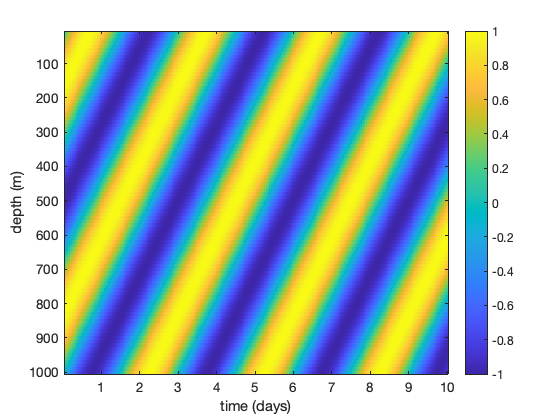

In [86]:
H=1000;

dt=0.05; %time interval about 20 times a day
dz=10; %10-m
t=dt:dt:10; %time in days
z=(dz:dz:H)'; %depth in m

%indices for the calculation
iz=1:length(z);
it=1:length(t);

%Generate a propagating signal with no noise.
[tt,zz]=meshgrid(t,z);
sig1=sin(3*pi*zz/H + 2*pi*1/3*tt);
%Change the sign to make propagation go the other way.

data=sig1;

% plot
figure(2)
imagesc(t,z,data);colorbar; axis ij
xlabel('time (days)')
ylabel('depth (m)')

This will show a propagating signal.

To compute a frequency-wavenumber spectrum for this, we just need to Fourier transform in
two dimensions.  Since this is a noise free case, we can be fairly cavalier about how
we approach it.

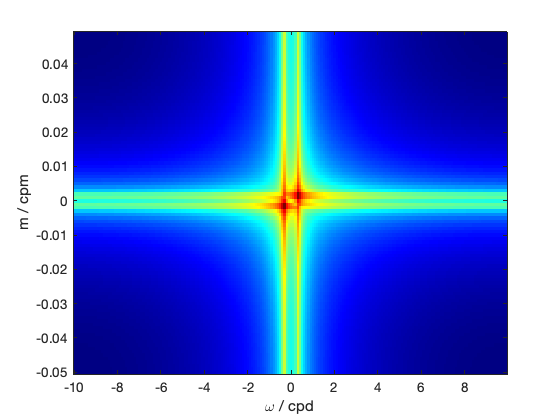

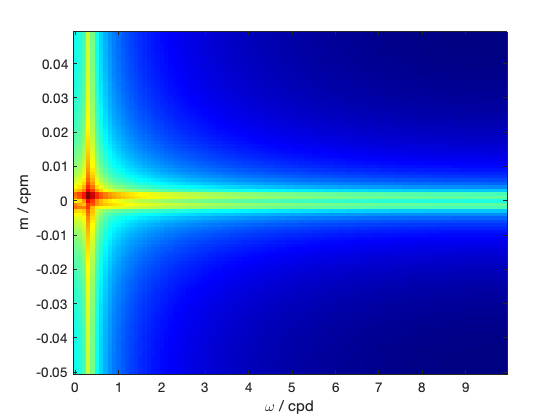

In [87]:
[m,n]=size(data);

fn=1/2/dt;
kn=1/2/dz;

%fundamental frequency and wavenumber
df=1./n./dt;
dk=1./m./dz;


% make frequencies and wavenumbers that run from -Nyquist to + Nyquist
f=[-fliplr(1:(n/2)) 0 (1:(n/2-1))].*df;
k=[-fliplr(1:(m/2)) 0 (1:(m/2-1))].'.*dk;

% Fourier transform in two dimensions
%   here we use fft2 for the 2-d Fourier transform
%   and fftshift to reorder the Fourier transform
st=fftshift(fft2(data))/m/n;

% turn this into a spectrum
spec=st.*conj(st)./df./dk; %UNITS: (m/s)^2/cpd/cpm

% and plot
figure(3)
imagesc(f,k,log10(spec)); axis xy
colormap(jet)
shg
xlabel('\omega / cpd')
ylabel('m / cpm')

% this plots the full 2-d plane

% But you might want a half plane.  In that case, you should
% scale by a factor of 2:
figure(4)
spec=2*spec(:,101:200);
imagesc(f(101:200),k,log10(spec)); axis xy
colormap(jet)
shg
xlabel('\omega / cpd')
ylabel('m / cpm')

Now what happens when you have noise and need to segment?  Let's make a larger data set
and chop it up into pieces:

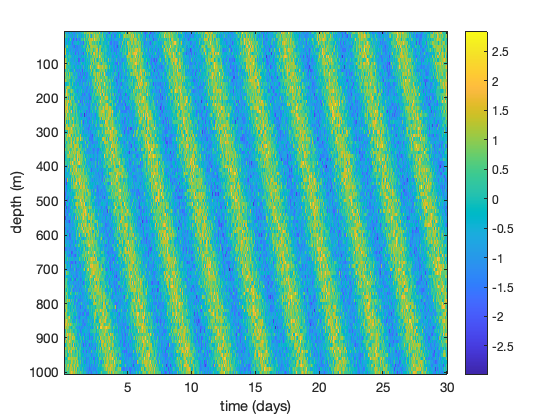

In [68]:
t=dt:dt:30; %time in days
z=(dz:dz:H)'; %depth in m

%indices for the calculation
iz=1:length(z);
it=1:length(t);

%Generate a propagating signal with some noise.
[tt,zz]=meshgrid(t,z);
sig1=sin(3*pi*zz/H - 2*pi*1/3*tt) + .5*randn(length(z),length(t));
data=sig1;

% plot
figure(2)
imagesc(t,z,data);colorbar; axis ij
xlabel('time (days)')
ylabel('depth (m)')

To chop this into segments, we have choices to chop in time or space or both.

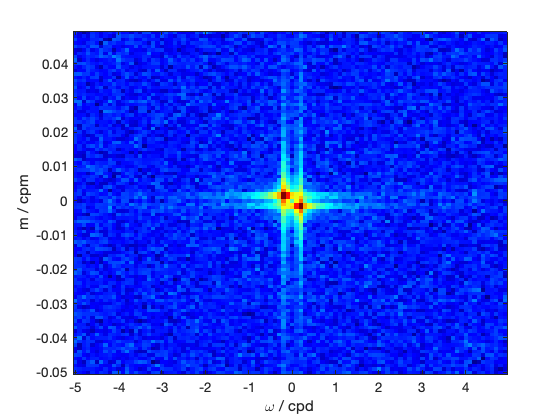

In [59]:
icount=0; clear st;
for i=1:50:501
 icount=icount+1;
 data_use=data(:,i:i+99);
 n_use=size(data_use,2);
 st(:,:,icount)=fftshift(fft2(data_use))/m/n_use;
end

spec=sum(abs(st).^2/df/dk,3);
f=[-fliplr(1:(n_use/2)) 0 (1:(n_use/2-1))].*df;
figure(3)
imagesc(f,k,log10(spec)); axis xy
colormap(jet)
shg
xlabel('\omega / cpd')
ylabel('m / cpm')

Interestingly, we can achieve the averaging that we need, either by segmenting in time or in
space or in both directions.  We do have to be careful about detrending, and we need to 
pay attention to our windowing strategy.

**Rotary Spectra**

We've discussed spectra for scalar quantities:  temperature, wind speed, or atmospheric pCO$_2$.  And we're learned that the positive and negative parts of the spectrum are the same for real quantities.  

But what happens when we think about a vector quantity such as velocity?  Of course you can treat the $u$ and $v$ components of velocity as separate scalars, but that might fail to capture the complexity of the overall motion.  Rotary spectra provide a way to examine vector motions as a combined quantity.

To start thinking about rotary spectra, let's think about a single frequency.  Imagine that you're sitting on the beach on a summer day.  In the afternoon, as the land warms, wind starts blowing onshore from the ocean.  This is the classic sea breeze.  The wind direction reverses at night, when wind blows from the cold land to the warm ocean.  Our cartoon schematics suggest that this is just an onshore/offshore circulation, but of course we live on a rotating planet, so the sea breeze, like everything else, rotates with the Earth's rotation and so probably traces out an ellipse.  If we had a full anemometer, we would be able to identify this pattern of circulation.  It would be nice to have a way to characterize how and what direction the rotation is for this freqeuncy - and then for all freqeuncies in the spectrum.

Turns out we can do this.  Consider a hypothetical wind that is rotating counterclockwise:
\begin{eqnarray}
u(t) & = & \cos(\omega t)\\
v(t) & = & \sin(\omega t)
\end{eqnarray}

We can form a complex vector 

$$
U(t)  = u(t) +iv(t)
$$ 

which for our simple CCW example is just
$$ 
U_{CCW}(t)=e^{i\omega t},
$$
and if we'd chosen the phasing between our sine and cosine above differently, we'd have been able to create a clockwise signal:
$$ 
U(t)_{CW}=e^{-i\omega t},
$$

Now returning to our expression from lecture 7, 
$$
x(t) = \sum_{q=-\infty}^{\infty}\left[\hat{a}_q \exp(i2\pi q f_1 t)\right]
$$
we are reminded that a sine or cosine (a real time series) winds up having Fourier amplitudes at $\pm \omega$ that are complex conjugates of each other.

But now we can see that the Fourier transform of $U_{CCW}$ is a $\delta$ function at $+\omega$, since it represents a phasor on the complex plane moving toward greater values. The transform of $U_{CW}$ appears at $-\omega$. The value of the positive/negative Fourier amplitudes of a rotary variable such as $U$ is now interpreted as "how much of the signal is rotating counterclockwise/clockwise at that frequency?"  

These are the bones of a very useful extension of the spectrum known as the rotary spectrum.  (For more details, you can see Mooers (1970) or Gonella (1970).). To compute it, we simply take a complex time series and compute the spectrum as we would have before, but now we keep both the positive and negative frequencies since they contain independent information from each other.

Let's look at an example from the PAPA record.  Here, recall we saw a strong inertial peak, which in the northern hemisphere should correspond to nearly circular counterclockwise motions.  Let's compute the spectrum and see if they do indeed show up at $-f$ where $f$ is the inertial or Coriolis frequency.

In [ ]:
%Let's load in some real data from Alford et al (2012) and have a look.
clear all
cd('/Users/malford/GoogleDrive/Work/Projects/Teaching/sio221a/MHA_2022/')
load('data/Vel_2008-2009.mat')

figure(1)
ezpc(Vel.dtnum,Vel.z,Vel.u);
caxis([-.25 .25]);colormap(redblue);colorbar
shg
title('E/W velocity - m/s')
datetick
xlabel('Time')
ylabel('depth / m')

figure(2)
iz=min(find(Vel.z > 300));
it=1:length(Vel.dtnum);

data=Vel.u(iz,it);
time=Vel.dtnum(it);

plot(time,data)
ylabel('E/W velocity - m/s')
xlabel('Time')


datetick

%Now we will make a complex vector.
it=1:16000;
data=Vel.u(iz,it)+i*Vel.v(iz,it);
time=Vel.dtnum(it);
dt=nanmean(diff(time));

disp(['Sample interval is ' num2str(dt*24*60) ' minutes.'])

disp(['record length is ' num2str(nanmax(time) - nanmin(time)) ' days long.'])
%% Check it for nans!
disp(['The record has ' num2str(length(find(isnan(data)))) ' NaNs.'])

%Now we compute the rotary spectrum.
data=detrend(data);
a=fft(data); %Note we keep all the coefficients instead of throwing out half.
a=fftshift(a); %And now we use fftshift to rearrange them to have 0 frequency in the middle.
N=length(data);
amp=abs(a).^2; % for even N

%% which freqs do these correspond to?
T=dt*N;

df=1/T;
fn=1/2/dt;

%Now frequency goes from negative fn to positive fn:
f=-N/2*df:df:N/2*df-df;

amp = amp / N.^2; % first correct for the MATLAB normalization
%amp = amp .* 2; %Now we keep the whole spectrum so we do not multiply by 2.
amp = amp / df; % this is then the definition of the spectrum

variance=nanmean(abs(data).^2)
sum_spec=sum(amp)*df
sum_spec / variance
%Check!  It gives the variance.

loglog(f,amp,-f,amp)
legend('positive','negative')
ylabel('(m/s)^2/cpd')
xlabel('cpd')

As previously, we're getting somewhere, but we need to window our data to get better precision:

> In matlab.graphics.internal.ruler.rulerFunctions (line 116)
In ylim (line 31)
In freqline (line 13)


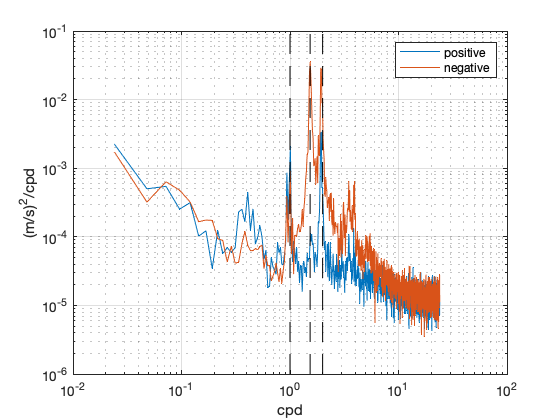

In [83]:
M=8; p=N/M;
    datab=reshape(data,N/M,M); % this gives us an array with N/M points
              % per column and M columns
    b=fft(datab);  % this computes the fft for each column
    b=fftshift(b);
    amp_b=abs(b).^2; 

%% Compute frequencies - note differences!

Tb=dt*p;

dfb=1/Tb;
fn=1/2/dt;

fb=0:dfb:fn; %frequency vector, cpd, goes from 0 to Nyquist.
fb=-p/2*dfb:dfb:p/2*dfb-dfb;

%% Normalize as above
amp_b = amp_b / p.^2; % first correct for the MATLAB normalization
amp_b = amp_b / dfb; % this is then the definition of the spectrum


loglog(fb,nanmean(amp_b,2),-fb,nanmean(amp_b,2))
freqline(2*sind(50));
freqline(2);
freqline(1);

grid
legend('positive','negative')
ylabel('(m/s)^2/cpd')
xlabel('cpd')

We can now see some interesting features. As expected, there are some big differences at $f$ between positive and negative frequencies - energy at $-f$ is over 100 times that at $+f$, implying nearly circularly polarized motion as expected.  

At the tidal peaks, we can see less of an imbalance - particularly at the diurnal frequencies where the CW and CCW energy is about equal.  As we implied above, that implies much more rectilinear motion as we expect for a back-and-forth tidal flow.     

At high freqeuncy, we also see nearly equal energy.  As it turns out and as you'll learn when you cover internal waves in your waves class, internal waves have a "polarization relationship" that specifies that they should be nearly circular at $f,$ and rectilinear at high frequency, as observed.

#### More details on rotary coefficients

We can now see one way of understanding why real time series have mirrored positive and negative frequencies: a rectilinear motion (say $u=\cos(\omega t)$) can be represented as counterclockwise and clockwise motions of the same amplitude.  In fact, there are interesting relationships between the rotary coefficients and the ellipse properties of the complex time series.

For the diurnal cycle, as for any wind frequency, I can write the wind as:
\begin{eqnarray}
u(t) & = & a_1 \cos(\omega t) + b_1\sin(\omega t)\\
v(t) & = & a_2 \cos(\omega t) + b_2 \sin(\omega t)
\end{eqnarray}
Or we can represent this as a complex number:
\begin{eqnarray}
U(t) & = & u(t) +iv(t) \\
& = & a_1 \cos(\omega t) + b_1\sin(\omega t) + a_2 \cos(\omega t) + b_2 \sin(\omega t) \\
& = & (a_1 + i a_2)\cos(\omega t) + (b_1 + i b_2)\sin(\omega t)
\end{eqnarray}
That gives us a vector motion in phase with the cosine and a vector motion
in phase with the sine.  But we're mixing complex amplitudes with real
trigonometric functions in this form.

A different way to think of this is as a rotational components in the
clockwise and counter-clockwise directions:
\begin{eqnarray}
U(t) & = & U^+ e^{i\omega t} + U^- e^{-i\omega t} \\
& = & U^+\left(\cos(\omega t) + i\sin(\omega t)\right) + 
  U^-\left(\cos(\omega t) - i\sin(\omega t)\right)  \\
& = & (U^++U^-)\cos(\omega t) + (U^+-U^-)i\sin(\omega t)
\end{eqnarray}
Here $e^{i\omega t}$ corresponds to counter-clockwise motion and
$e^{-i\omega t}$ corresponds to clockwise motion.
Since both expressions for U(t) have to be equivalent, this means that
\begin{eqnarray}
U^+ & = & \frac{a_1 + b_2 + i(a_2-b_1)}{2}\\
U^- & = & \frac{a_1 - b_2 + i(a_2+b_1)}{2}.
\end{eqnarray}
The magnitude of these terms will give the rotary spectral components.

We can think of these terms as defining an ellipse with major axis $|U^+| + |U^-|$
and minor axis $||U^+| - |U^-||$.  At each frequency, we can define three
additional parameters.  Two of these depend on angles, which we define as
\begin{eqnarray}
\epsilon^+ & = & \tan^{-1}\left(\frac{a_2-b_1}{a_1+b_2}\right)\\
\epsilon^- & = & \tan^{-1}\left(\frac{a_2+b_1}{a_1-b_2}\right)
\end{eqnarray}
Then the orientation of the ellipse is:
\begin{equation}
\theta = \frac{\epsilon^+ + \epsilon^-}{2},
\end{equation}
and the phase of the ellipse (corresponding to the time when the velocity
is at a maximum) is:
\begin{equation}
\phi = \frac{\epsilon^+ - \epsilon^-}{2},
\end{equation}
Finally, we can ask whether the motion is predominantly clockwise or counterclockwise by determining the sign of $|U^+| - |U^-|$.

While these parameters can be used to assess motions at a single frequency,
more broadly they can be extracted from the Fourier transform to tell us
about all frequencies.  To do this, we just have to remember that $a_1 + i b_1$ are the Fourier coefficients for $u$ and $a_2+i b_2$ represent the Fourier coefficients for $v$, so we can extract the values that we need.

If we separately Fourier transform $u$ and $v$,
then the clockwise spectrum is the positive frequencies for the Fourier transform of $u$ plus $i$ times the negative frequencies for the Fourier transform of $v$.  the counterclockwise spectrum is the opposite:  negative frequencies for the Fourier transform of $u$ plus $i$ times the positive frequencies for the Fourier tranform of $u$.

It's useful to consider some limiting cases.  Suppose that $v$ is zero and $u$ us proportional to $\cos(\omega t)$.  Then only $a_1$ is non-zero, so $U^+$ and
$U^-$ are both $a_1/2$, the major axis is $a_1$.  The angles $\epsilon^+$ and
$\epsilon^-$ are both 0, so the orientation angle $\theta=0$ and the time of
maximum $\phi=0$, consistent with cosine being a maximum when $t=0$.  You
can work through other cases to see how they express themselves in rotary form.

(For a
good discussion of this, check out course notes by Miles Sundermeyer (U.
Mass Dartmouth).)